# Importing Necessary Libraries 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from scipy.stats import f_oneway
from scipy.stats import shapiro



In [2]:
df = pd.read_csv("master_sheet.csv")

In [3]:
df.head()

,Hospital_Name,Hospital_Ownership,Hospital_Type,State,City,ZIP_Code,Hospital_overall_rating,County_Name,Location,Emergency_Services,Patient_experience_national_comparison
0,MARSHALL MEDICAL CENTER SOUTH,Government - Hospital District or Authority,Acute Care Hospitals,AL,BOAZ,35957,3,MARSHALL,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n",True,Same as the national average
1,DEKALB REGIONAL MEDICAL CENTER,Proprietary,Acute Care Hospitals,AL,FORT PAYNE,35968,3,DE KALB,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n",True,Same as the national average
2,WEDOWEE HOSPITAL,Government - Hospital District or Authority,Acute Care Hospitals,AL,WEDOWEE,36278,4,RANDOLPH,"209 NORTH MAIN STREET\nWEDOWEE, AL\n",True,Not Available
3,HALE COUNTY HOSPITAL,Government - Local,Acute Care Hospitals,AL,GREENSBORO,36744,Not Available,HALE,"508 GREEN STREET\nGREENSBORO, AL\n",True,Not Available
4,CRESTWOOD MEDICAL CENTER,Proprietary,Acute Care Hospitals,AL,HUNTSVILLE,35801,3,MADISON,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n",True,Same as the national average


In [4]:
df.tail()

,Hospital_Name,Hospital_Ownership,Hospital_Type,State,City,ZIP_Code,Hospital_overall_rating,County_Name,Location,Emergency_Services,Patient_experience_national_comparison
4807,CLEAR LAKE REGIONAL MEDICAL CENTER,Proprietary,Acute Care Hospitals,TX,WEBSTER,77598,3,HARRIS,"500 MEDICAL CENTER BLVD\nWEBSTER, TX\n(29.5410...",True,Below the national average
4808,ORTHOPAEDIC HOSPITAL OF WISCONSIN,Voluntary non-profit - Other,Acute Care Hospitals,WI,GLENDALE,53212,Not Available,MILWAUKEE,"475 W RIVER WOODS PKWY\nGLENDALE, WI\n(43.0982...",False,Above the national average
4809,CARILION GILES COMMUNITY HOSPITAL,Voluntary non-profit - Private,Critical Access Hospitals,VA,PEARISBURG,24134,4,GILES,"159 HARTLEY WAY\nPEARISBURG, VA\n(37.332697, -...",True,Above the national average
4810,PLEASANT VALLEY HOSPITAL,Voluntary non-profit - Private,Acute Care Hospitals,WV,POINT PLEASANT,25550,3,MASON,"2520 VALLEY DRIVE\nPOINT PLEASANT, WV\n(38.868...",True,Same as the national average
4811,JOHNSTON MEMORIAL HOSPITAL,Voluntary non-profit - Private,Acute Care Hospitals,VA,ABINGDON,24211,3,WASHINGTON,"16000 JOHNSTON MEMORIAL DRIVE\nABINGDON, VA\n(...",True,Below the national average


## data cleaning

In [5]:
df.shape

(4812, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Hospital_Name                           4812 non-null   object
 1   Hospital_Ownership                      4812 non-null   object
 2   Hospital_Type                           4812 non-null   object
 3   State                                   4812 non-null   object
 4   City                                    4812 non-null   object
 5   ZIP_Code                                4812 non-null   int64 
 6   Hospital_overall_rating                 4812 non-null   object
 7   County_Name                             4797 non-null   object
 8   Location                                4812 non-null   object
 9   Emergency_Services                      4812 non-null   bool  
 10  Patient_experience_national_comparison  4812 non-null   object
dtypes: b

In [7]:
df.isnull().sum()

Hospital_Name                              0
Hospital_Ownership                         0
Hospital_Type                              0
State                                      0
City                                       0
ZIP_Code                                   0
Hospital_overall_rating                    0
County_Name                               15
Location                                   0
Emergency_Services                         0
Patient_experience_national_comparison     0
dtype: int64

## Considering not avaliable as 6 because hospital some patients  may not provides rating

In [8]:
df['Hospital_overall_rating'] = df['Hospital_overall_rating'].replace('Not Available', '6')

In [9]:
df['Hospital_overall_rating'].unique()

array(['3', '4', '6', '2', '5', '1'], dtype=object)

In [10]:
df['Hospital_overall_rating']=df['Hospital_overall_rating'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Hospital_Name                           4812 non-null   object
 1   Hospital_Ownership                      4812 non-null   object
 2   Hospital_Type                           4812 non-null   object
 3   State                                   4812 non-null   object
 4   City                                    4812 non-null   object
 5   ZIP_Code                                4812 non-null   int64 
 6   Hospital_overall_rating                 4812 non-null   int32 
 7   County_Name                             4797 non-null   object
 8   Location                                4812 non-null   object
 9   Emergency_Services                      4812 non-null   bool  
 10  Patient_experience_national_comparison  4812 non-null   object
dtypes: b

In [12]:
df['Hospital_overall_rating'].unique()

array([3, 4, 6, 2, 5, 1])

In [13]:
df['State'].value_counts()

TX    411
CA    343
FL    187
IL    180
NY    171
PA    171
OH    168
KS    137
GA    133
MN    131
MI    131
WI    126
OK    124
LA    121
IN    120
IA    116
MO    112
TN    107
NC    107
MS     95
KY     94
WA     91
AL     90
NE     89
VA     86
AZ     80
CO     78
AR     75
NJ     66
MA     64
MT     62
OR     60
SC     60
SD     60
PR     52
MD     49
WV     49
UT     46
ND     44
NM     41
ID     41
NV     35
ME     33
CT     31
WY     28
NH     26
HI     23
AK     22
VT     14
RI     11
DC      8
DE      7
VI      2
GU      2
AS      1
MP      1
Name: State, dtype: int64

In [14]:
df['County_Name'].value_counts()

LOS ANGELES    83
COOK           51
JEFFERSON      47
WASHINGTON     44
MONTGOMERY     43
               ..
TWIN FALLS      1
COLES           1
BLUE EARTH      1
ALGER           1
BOSQUE          1
Name: County_Name, Length: 1563, dtype: int64

In [15]:
df['Emergency_Services'].value_counts()

True     4497
False     315
Name: Emergency_Services, dtype: int64

## Data vizulization

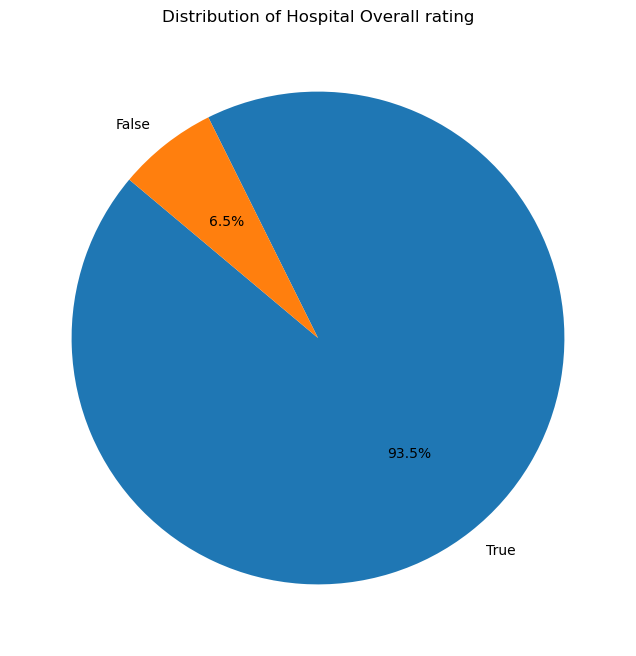

In [16]:
Emergency_services = df['Emergency_Services'].value_counts()

# Set the size of the figure
plt.figure(figsize=(8, 8))

# Create a pie chart
plt.pie(Emergency_services, labels=Emergency_services.index, autopct='%1.1f%%', startangle=140)

# Optional: Improve the aesthetics of the plot
plt.title('Distribution of Hospital Overall rating')

# Show the plot
plt.show()

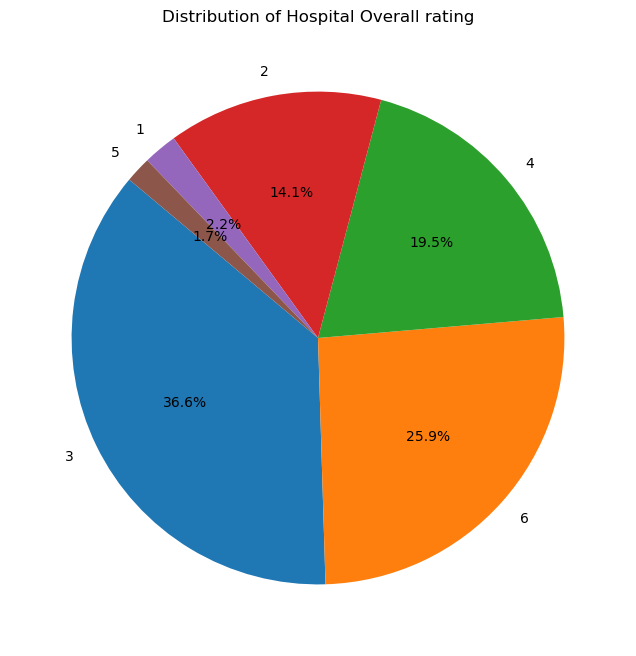

In [17]:
hospital_overall_rating = df['Hospital_overall_rating'].value_counts()

# Set the size of the figure
plt.figure(figsize=(8, 8))

# Create a pie chart
plt.pie(hospital_overall_rating, labels=hospital_overall_rating.index, autopct='%1.1f%%', startangle=140)

# Optional: Improve the aesthetics of the plot
plt.title('Distribution of Hospital Overall rating')

# Show the plot
plt.show()


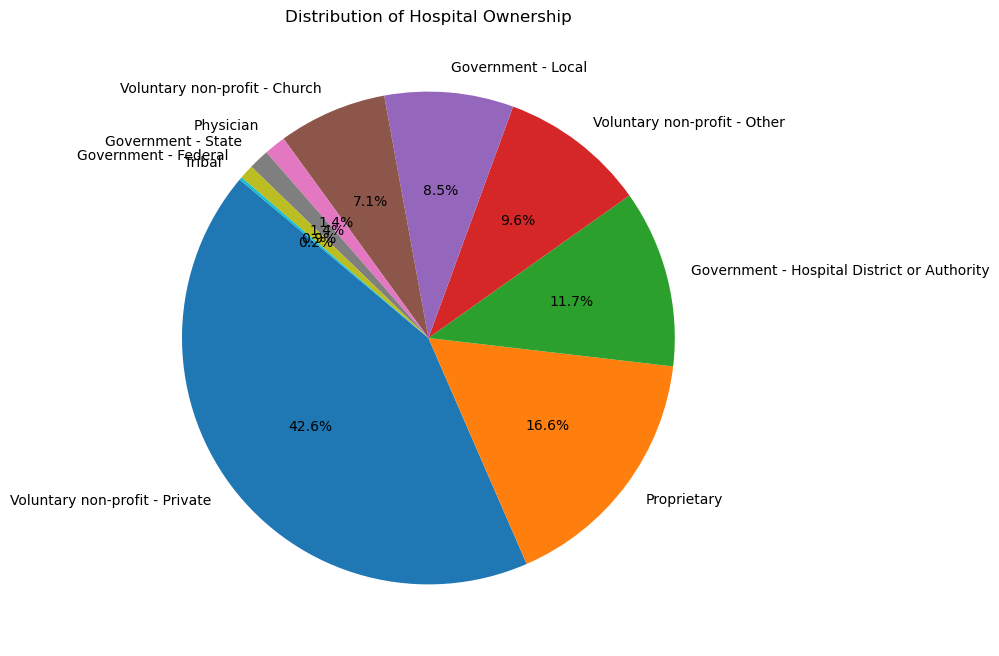

In [18]:
ownership_counts = df['Hospital_Ownership'].value_counts()

# Set the size of the figure
plt.figure(figsize=(8, 8))

# Create a pie chart
plt.pie(ownership_counts, labels=ownership_counts.index, autopct='%1.1f%%', startangle=140)

# Optional: Improve the aesthetics of the plot
plt.title('Distribution of Hospital Ownership')

# Show the plot
plt.show()


Text(0, 0.5, 'Count')

<Figure size 1800x1600 with 0 Axes>

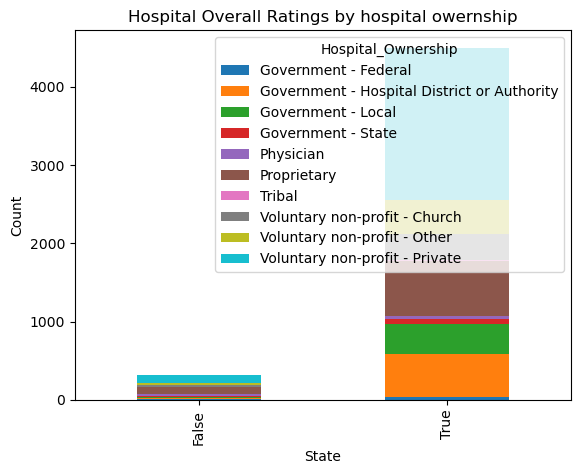

In [19]:
state_rating_counts = df.groupby(['Emergency_Services', 'Hospital_Ownership']).size().unstack()

# Set the size of the figure
plt.figure(figsize=(18, 16))

# Plot a stacked bar graph
state_rating_counts.plot(kind='bar', stacked=True)

# Optional: Improve the aesthetics of the plot
plt.title('Hospital Overall Ratings by hospital owernship')
plt.xlabel('State')
plt.ylabel('Count')

# Show the plot

In [20]:
df['Emergency_Services'].unique()

array([ True, False])

In [21]:

# Pivot the table to get state-wise and hospital ownership-wise data
pivot_table = df.pivot_table(index=['State', 'Hospital_Ownership'], values='Emergency_Services', aggfunc='sum').reset_index()

# Display the table
pivot_table


,State,Hospital_Ownership,Emergency_Services
0,AK,Government - Federal,2
1,AK,Government - Local,7
2,AK,Proprietary,1
3,AK,Tribal,3
4,AK,Voluntary non-profit - Church,3
...,...,...,...
335,WY,Government - Local,8
336,WY,Physician,0
337,WY,Proprietary,3
338,WY,Voluntary non-profit - Other,1


## From above graph valuntary non profit -private hospitals has more raitng compare to other hospitals . [Note] 6 has no rating for hospitals

Text(0, 0.5, 'Count')

<Figure size 1800x1000 with 0 Axes>

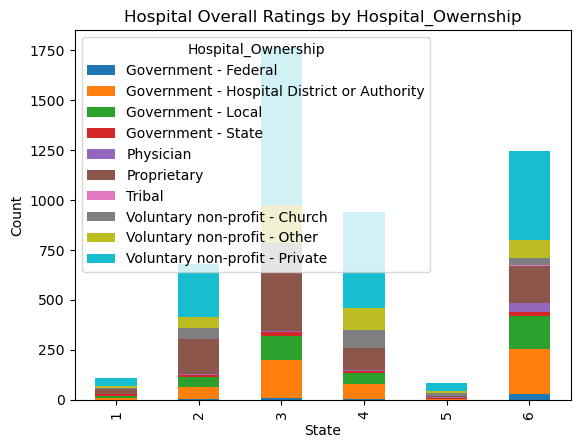

In [22]:
state_rating_counts = df.groupby(['Hospital_overall_rating', 'Hospital_Ownership']).size().unstack()

# Set the size of the figure
plt.figure(figsize=(18, 10))

# Plot a stacked bar graph
state_rating_counts.plot(kind='bar', stacked=True)

# Optional: Improve the aesthetics of the plot
plt.title('Hospital Overall Ratings by Hospital_Owernship')
plt.xlabel('State')
plt.ylabel('Count')

# Show the plot

In [23]:
# Pivot the table to get state-wise and hospital ownership-wise data
pivot_table2 = df.pivot_table(index=['County_Name', 'Hospital_Ownership'], values='Hospital_overall_rating', aggfunc='sum').reset_index()

# Display the table
pivot_table2


,County_Name,Hospital_Ownership,Hospital_overall_rating
0,ABBEVILLE,Government - Local,4
1,ACADIA,Government - Hospital District or Authority,6
2,ACADIA,Proprietary,2
3,ACCOMACK,Voluntary non-profit - Private,4
4,ADA,Proprietary,6
...,...,...,...
2759,YORK,Voluntary non-profit - Private,30
2760,YOUNG,Government - Hospital District or Authority,9
2761,YUBA,Voluntary non-profit - Private,1
2762,YUMA,Government - Hospital District or Authority,9


<Figure size 2500x2000 with 0 Axes>

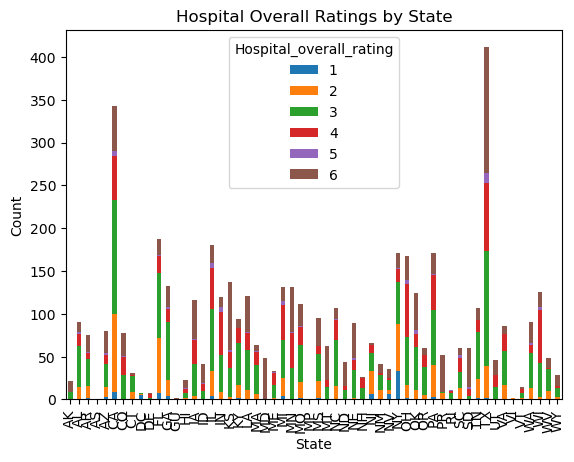

In [24]:

state_rating_counts = df.groupby(['State', 'Hospital_overall_rating']).size().unstack()

# Set the size of the figure
plt.figure(figsize=(25, 20))

# Plot a stacked bar graph
state_rating_counts.plot(kind='bar', stacked=True)

# Optional: Improve the aesthetics of the plot
plt.title('Hospital Overall Ratings by State')
plt.xlabel('State')
plt.ylabel('Count')

# Show the plot
plt.show()


In [25]:
top_10_states = df['State'].value_counts().head(10)

In [26]:
top_10_states

TX    411
CA    343
FL    187
IL    180
NY    171
PA    171
OH    168
KS    137
GA    133
MN    131
Name: State, dtype: int64

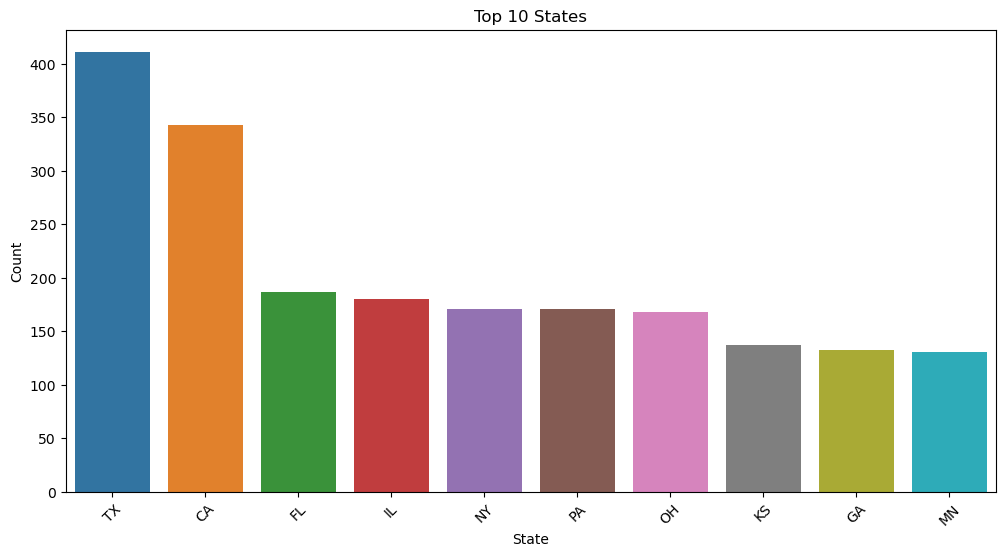

In [27]:

top_10_states = df['State'].value_counts().head(10)

# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a bar plot for the top 10 states
sns.barplot(x=top_10_states.index, y=top_10_states.values)

# Optional: Improve the aesthetics of the plot
plt.title('Top 10 States')
plt.xlabel('State')
plt.ylabel('Count')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


•	Calculate descriptive statistics in Python on patient satisfaction scores grouped by ownership type. 
•	Create visualizations in Python like boxplots showing the distribution of scores for each question by ownership category. 
•	Output summary tables and charts as image files.


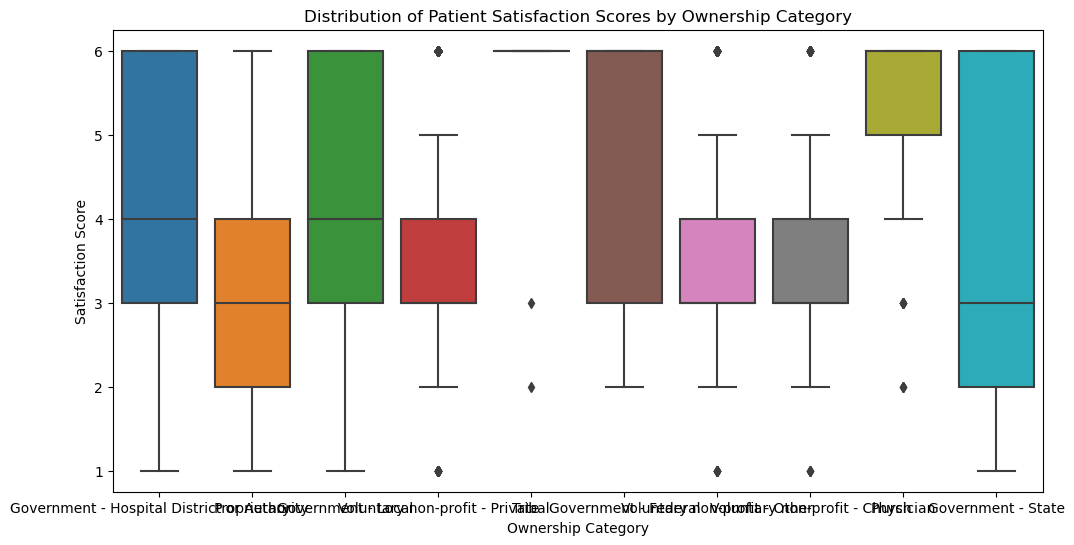

Descriptive Statistics:
                                              count      mean       std  min  \
Hospital_Ownership                                                             
Government - Federal                           45.0  4.911111  1.549519  2.0   
Government - Hospital District or Authority   561.0  4.208556  1.567869  1.0   
Government - Local                            407.0  4.179361  1.629399  1.0   
Government - State                             65.0  3.646154  1.797835  1.0   
Physician                                      68.0  5.338235  1.192142  2.0   
Proprietary                                   800.0  3.556250  1.509034  1.0   
Tribal                                          9.0  5.222222  1.563472  2.0   
Voluntary non-profit - Church                 343.0  3.457726  1.151070  1.0   
Voluntary non-profit - Other                  462.0  3.699134  1.328137  1.0   
Voluntary non-profit - Private               2052.0  3.758285  1.377557  1.0   

               

In [28]:
# Calculate descriptive statistics grouped by ownership type
descriptive_stats = df.groupby('Hospital_Ownership')['Hospital_overall_rating'].describe()

# Create boxplots showing the distribution of scores for each question by ownership category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hospital_Ownership', y='Hospital_overall_rating', data=df)
plt.title('Distribution of Patient Satisfaction Scores by Ownership Category')
plt.xlabel('Ownership Category')
plt.ylabel('Satisfaction Score')
plt.savefig('boxplot.png')  # Save the boxplot as an image file
plt.show()

# Output summary tables
print("Descriptive Statistics:")
print(descriptive_stats)

# Save descriptive statistics as a CSV file
descriptive_stats.to_csv('descriptive_statistics.csv', header=True)

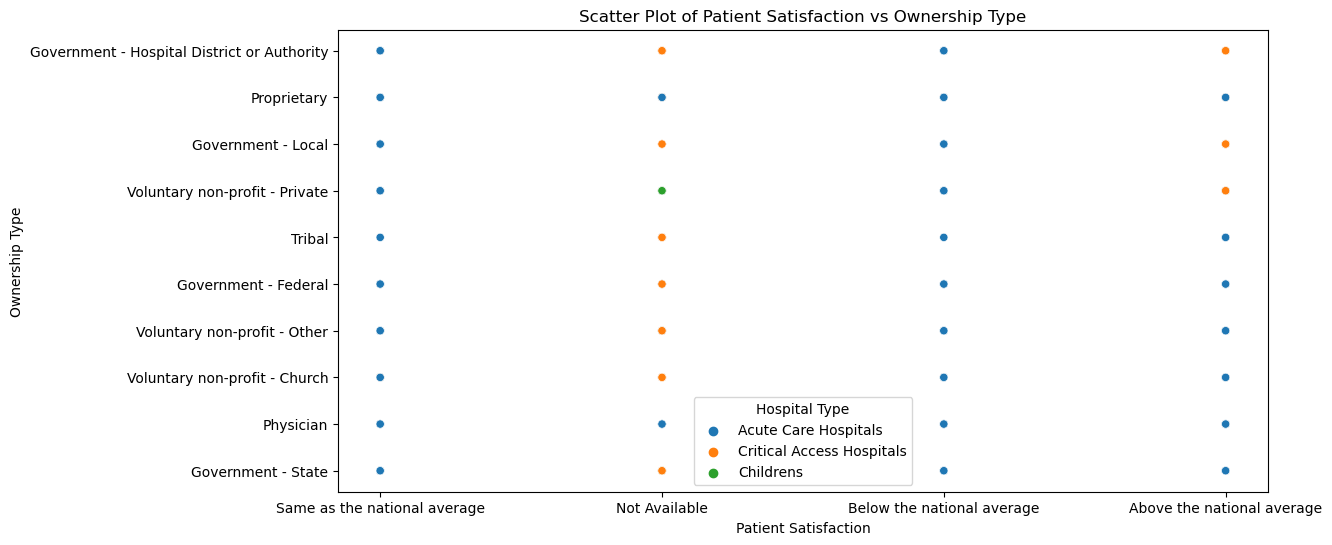

In [29]:


# Set the size of the figure
plt.figure(figsize=(12, 6))

# Create a scatter plot colored by non-profit vs for-profit
sns.scatterplot(x='Patient_experience_national_comparison', y='Hospital_Ownership', hue='Hospital_Type', data=df)

# Optional: Improve the aesthetics of the plot
plt.title('Scatter Plot of Patient Satisfaction vs Ownership Type')
plt.xlabel('Patient Satisfaction')
plt.ylabel('Ownership Type')
plt.legend(title='Hospital Type')

# Save the scatter plot as an image file
plt.savefig('scatter_plot.png')

# Show the plot
plt.show()


## Dropping hospital name and locaton it is not necessary for prediction  

In [30]:
df

,Hospital_Name,Hospital_Ownership,Hospital_Type,State,City,ZIP_Code,Hospital_overall_rating,County_Name,Location,Emergency_Services,Patient_experience_national_comparison
0,MARSHALL MEDICAL CENTER SOUTH,Government - Hospital District or Authority,Acute Care Hospitals,AL,BOAZ,35957,3,MARSHALL,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n",True,Same as the national average
1,DEKALB REGIONAL MEDICAL CENTER,Proprietary,Acute Care Hospitals,AL,FORT PAYNE,35968,3,DE KALB,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n",True,Same as the national average
2,WEDOWEE HOSPITAL,Government - Hospital District or Authority,Acute Care Hospitals,AL,WEDOWEE,36278,4,RANDOLPH,"209 NORTH MAIN STREET\nWEDOWEE, AL\n",True,Not Available
3,HALE COUNTY HOSPITAL,Government - Local,Acute Care Hospitals,AL,GREENSBORO,36744,6,HALE,"508 GREEN STREET\nGREENSBORO, AL\n",True,Not Available
4,CRESTWOOD MEDICAL CENTER,Proprietary,Acute Care Hospitals,AL,HUNTSVILLE,35801,3,MADISON,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n",True,Same as the national average
...,...,...,...,...,...,...,...,...,...,...,...
4807,CLEAR LAKE REGIONAL MEDICAL CENTER,Proprietary,Acute Care Hospitals,TX,WEBSTER,77598,3,HARRIS,"500 MEDICAL CENTER BLVD\nWEBSTER, TX\n(29.5410...",True,Below the national average
4808,ORTHOPAEDIC HOSPITAL OF WISCONSIN,Voluntary non-profit - Other,Acute Care Hospitals,WI,GLENDALE,53212,6,MILWAUKEE,"475 W RIVER WOODS PKWY\nGLENDALE, WI\n(43.0982...",False,Above the national average
4809,CARILION GILES COMMUNITY HOSPITAL,Voluntary non-profit - Private,Critical Access Hospitals,VA,PEARISBURG,24134,4,GILES,"159 HARTLEY WAY\nPEARISBURG, VA\n(37.332697, -...",True,Above the national average
4810,PLEASANT VALLEY HOSPITAL,Voluntary non-profit - Private,Acute Care Hospitals,WV,POINT PLEASANT,25550,3,MASON,"2520 VALLEY DRIVE\nPOINT PLEASANT, WV\n(38.868...",True,Same as the national average


In [31]:
df['Hospital_Ownership'].unique()

array(['Government - Hospital District or Authority', 'Proprietary',
       'Government - Local', 'Voluntary non-profit - Private', 'Tribal',
       'Government - Federal', 'Voluntary non-profit - Other',
       'Voluntary non-profit - Church', 'Physician', 'Government - State'],
      dtype=object)

In [32]:


# Map ownership types to categories
df.loc[df['Hospital_Ownership'].str.contains('Government - Hospital District or Authority'), 'Ownership_Category'] = 'Public'
df.loc[df['Hospital_Ownership'].str.contains('Voluntary non-profit - Private'), 'Ownership_Category'] = 'Private Nonprofit'
df.loc[df['Hospital_Ownership'].str.contains('Proprietary'), 'Ownership_Category'] = 'Private For-Profit'
df.loc[df['Hospital_Ownership'].str.contains('Government - Local'), 'Ownership_Category'] = 'Public'
df.loc[df['Hospital_Ownership'].str.contains('Government - Federal'), 'Ownership_Category'] = 'Public'
df.loc[df['Hospital_Ownership'].str.contains('Government - State'), 'Ownership_Category'] = 'Public'
df.loc[df['Hospital_Ownership'].str.contains('Voluntary non-profit - Other'), 'Ownership_Category'] = 'Private Nonprofit'
df.loc[df['Hospital_Ownership'].str.contains('Voluntary non-profit - Church'), 'Ownership_Category'] = 'Private Nonprofit'
df.loc[df['Hospital_Ownership'].str.contains('Physician'), 'Ownership_Category'] = 'Private For-Profit'
df.loc[df['Hospital_Ownership'].str.contains('Tribal'), 'Ownership_Category'] = 'Other'


# Display the result
print(df[['Hospital_Ownership', 'Ownership_Category']])
df
df['Ownership_Category'].unique()

                               Hospital_Ownership  Ownership_Category
0     Government - Hospital District or Authority              Public
1                                     Proprietary  Private For-Profit
2     Government - Hospital District or Authority              Public
3                              Government - Local              Public
4                                     Proprietary  Private For-Profit
...                                           ...                 ...
4807                                  Proprietary  Private For-Profit
4808                 Voluntary non-profit - Other   Private Nonprofit
4809               Voluntary non-profit - Private   Private Nonprofit
4810               Voluntary non-profit - Private   Private Nonprofit
4811               Voluntary non-profit - Private   Private Nonprofit

[4812 rows x 2 columns]


array(['Public', 'Private For-Profit', 'Private Nonprofit', 'Other'],
      dtype=object)

In [ ]:
# Create a new column 'Profit_Status' based on 'Hospital_Ownership'
#df['Profit_Status'] = df['Hospital_Ownership'].apply(lambda x: 'Non-Profit' if 'non-profit' in x.lower() else 'For-Profit')

# Select only the relevant columns and the new 'Profit_Status' column
#new_df = df ['Profit_Status']

# Display the resulting DataFrame
#df['Profit_Status'].unique()




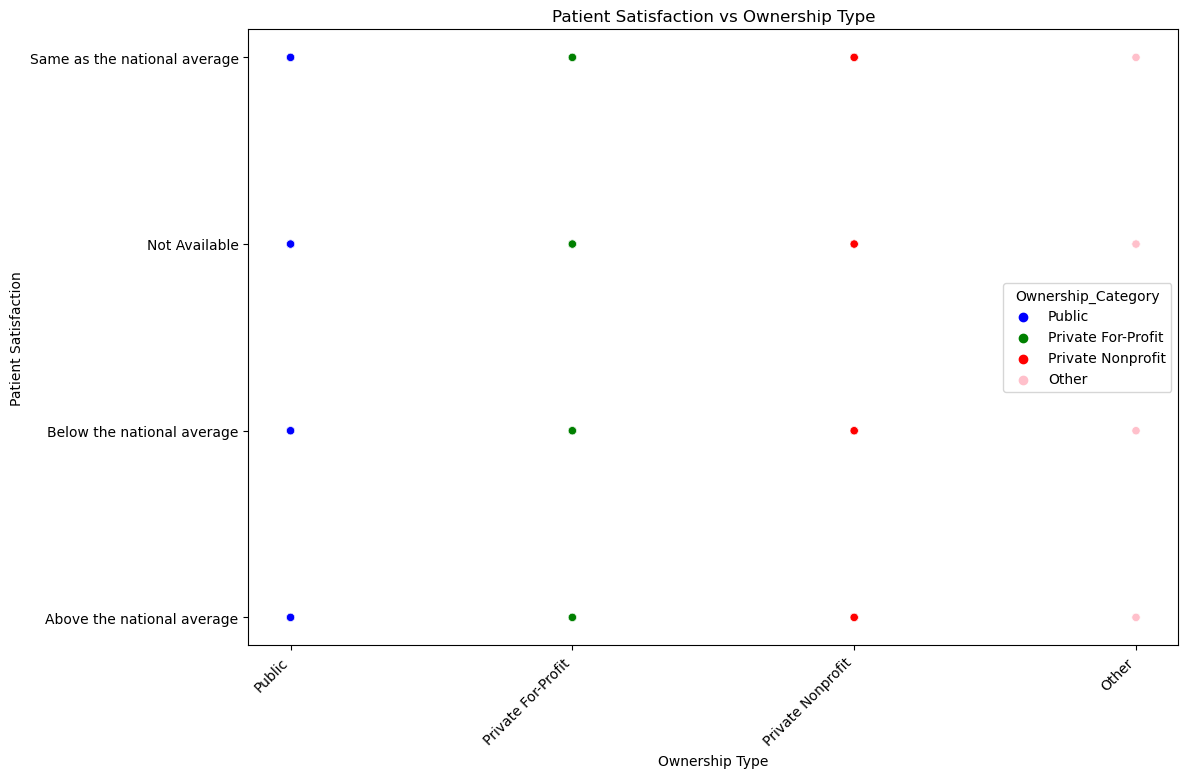

In [33]:
plt.figure(figsize=(12, 8))
scatterplot = sns.scatterplot(x='Ownership_Category', y='Patient_experience_national_comparison', hue='Ownership_Category', data=df, palette={'Public': 'blue', 'Private For-Profit': 'green', 'Private Nonprofit': 'red','Other':'Pink'})

# Customize the plot
scatterplot.set_title('Patient Satisfaction vs Ownership Type')
scatterplot.set_xlabel('Ownership Type')
scatterplot.set_ylabel('Patient Satisfaction')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Save the plot as an image file (e.g., PNG)
plt.savefig('scatterplot_patient_satisfaction_vs_ownership.png', bbox_inches='tight')

# Display the plot
plt.show()

In [ ]:
#df['Profit_Status'].unique()

In [34]:
df.drop(['Hospital_Name','Location','ZIP_Code','Hospital_Ownership','Hospital_Type'],axis=1,inplace=True)

In [35]:
df

,State,City,Hospital_overall_rating,County_Name,Emergency_Services,Patient_experience_national_comparison,Ownership_Category
0,AL,BOAZ,3,MARSHALL,True,Same as the national average,Public
1,AL,FORT PAYNE,3,DE KALB,True,Same as the national average,Private For-Profit
2,AL,WEDOWEE,4,RANDOLPH,True,Not Available,Public
3,AL,GREENSBORO,6,HALE,True,Not Available,Public
4,AL,HUNTSVILLE,3,MADISON,True,Same as the national average,Private For-Profit
...,...,...,...,...,...,...,...
4807,TX,WEBSTER,3,HARRIS,True,Below the national average,Private For-Profit
4808,WI,GLENDALE,6,MILWAUKEE,False,Above the national average,Private Nonprofit
4809,VA,PEARISBURG,4,GILES,True,Above the national average,Private Nonprofit
4810,WV,POINT PLEASANT,3,MASON,True,Same as the national average,Private Nonprofit


In [36]:
excel_file_path = 'C:\\Users\\HP\\OneDrive\\Desktop\\Hospital data\\Cleaned_data.xlsx' ## Replace ur file path here


In [37]:
df.to_excel(excel_file_path, index=False)

OSError: Cannot save file into a non-existent directory: 'C:\Users\HP\OneDrive\Desktop\Hospital data'

## converting categroical into numerical 

In [ ]:
#df = pd.get_dummies(df, columns=['Hospital_Ownership'], prefix='Ownership', drop_first=True)

In [ ]:
#label_encoder = LabelEncoder()
#df['Hospital_Ownership'] = label_encoder.fit_transform(df['Hospital_Ownership'])

In [ ]:
#df

In [38]:
label_encoder = LabelEncoder()
#df['Hospital_Type'] = label_encoder.fit_transform(df['Hospital_Type'])

In [40]:
df

,State,City,Hospital_overall_rating,County_Name,Emergency_Services,Patient_experience_national_comparison,Ownership_Category
0,AL,BOAZ,3,MARSHALL,True,Same as the national average,Public
1,AL,FORT PAYNE,3,DE KALB,True,Same as the national average,Private For-Profit
2,AL,WEDOWEE,4,RANDOLPH,True,Not Available,Public
3,AL,GREENSBORO,6,HALE,True,Not Available,Public
4,AL,HUNTSVILLE,3,MADISON,True,Same as the national average,Private For-Profit
...,...,...,...,...,...,...,...
4807,TX,WEBSTER,3,HARRIS,True,Below the national average,Private For-Profit
4808,WI,GLENDALE,6,MILWAUKEE,False,Above the national average,Private Nonprofit
4809,VA,PEARISBURG,4,GILES,True,Above the national average,Private Nonprofit
4810,WV,POINT PLEASANT,3,MASON,True,Same as the national average,Private Nonprofit


In [39]:
df['State'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'PA', 'NV', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'VI', 'WY', 'AS', 'GU', 'MP', 'DC',
       'NH'], dtype=object)

In [41]:
df['City'].unique()

array(['BOAZ', 'FORT PAYNE', 'WEDOWEE', ..., 'PEARISBURG',
       'POINT PLEASANT', 'ABINGDON'], dtype=object)

In [42]:
df['Emergency_Services'] = label_encoder.fit_transform(df['Emergency_Services'])

In [43]:
df['Emergency_Services'].unique()

array([1, 0], dtype=int64)

In [44]:
df.columns

Index(['State', 'City', 'Hospital_overall_rating', 'County_Name',
       'Emergency_Services', 'Patient_experience_national_comparison',
       'Ownership_Category'],
      dtype='object')

In [45]:
df['County_Name'] = label_encoder.fit_transform(df['County_Name'])


In [46]:
df['State'] = label_encoder.fit_transform(df['State'])


In [47]:
df

,State,City,Hospital_overall_rating,County_Name,Emergency_Services,Patient_experience_national_comparison,Ownership_Category
0,1,BOAZ,3,877,1,Same as the national average,Public
1,1,FORT PAYNE,3,393,1,Same as the national average,Private For-Profit
2,1,WEDOWEE,4,1158,1,Not Available,Public
3,1,GREENSBORO,6,598,1,Not Available,Public
4,1,HUNTSVILLE,3,858,1,Same as the national average,Private For-Profit
...,...,...,...,...,...,...,...
4807,47,WEBSTER,3,621,1,Below the national average,Private For-Profit
4808,53,GLENDALE,6,929,0,Above the national average,Private Nonprofit
4809,49,PEARISBURG,4,545,1,Above the national average,Private Nonprofit
4810,54,POINT PLEASANT,3,880,1,Same as the national average,Private Nonprofit


In [ ]:
df['Ownership_Category'].unique()

In [48]:
df['City'] = label_encoder.fit_transform(df['City'])



In [49]:
df['Patient_experience_national_comparison'] = label_encoder.fit_transform(df['Patient_experience_national_comparison'])
df['Ownership_Category'] = label_encoder.fit_transform(df['Ownership_Category'])


In [50]:
df['Patient_experience_national_comparison'].unique()

array([3, 2, 1, 0])

In [51]:
df

,State,City,Hospital_overall_rating,County_Name,Emergency_Services,Patient_experience_national_comparison,Ownership_Category
0,1,263,3,877,1,3,3
1,1,900,3,393,1,3,1
2,1,2801,4,1158,1,2,3
3,1,1045,6,598,1,2,3
4,1,1220,3,858,1,3,1
...,...,...,...,...,...,...,...
4807,47,2798,3,621,1,1,1
4808,53,987,6,929,0,0,2
4809,49,2019,4,545,1,0,2
4810,54,2085,3,880,1,3,2


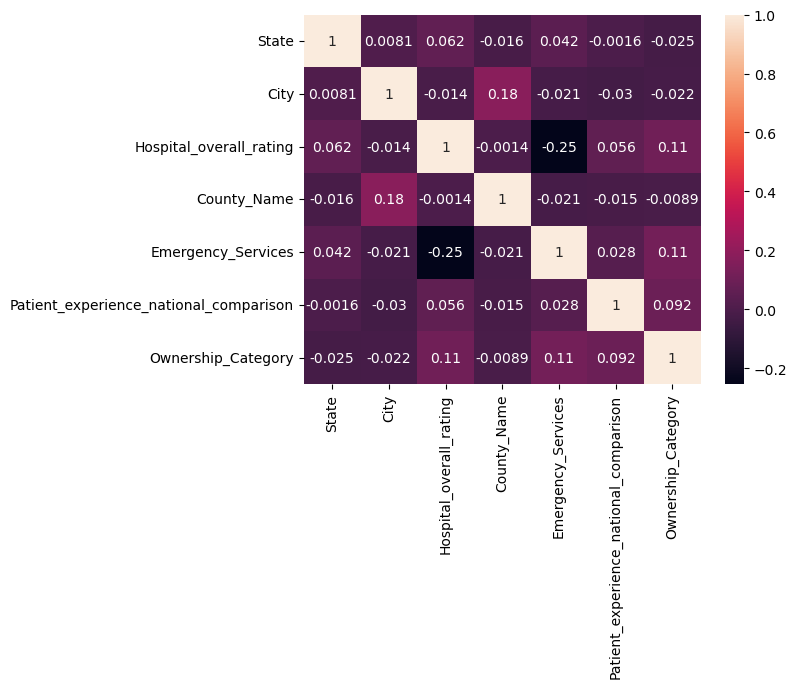

In [52]:
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

## Modeling Buliding

In [53]:
y = df['Patient_experience_national_comparison']

In [54]:
y.head()

0    3
1    3
2    2
3    2
4    3
Name: Patient_experience_national_comparison, dtype: int32

In [55]:
X = df.drop(['Patient_experience_national_comparison'],axis=1)

In [56]:
X

,State,City,Hospital_overall_rating,County_Name,Emergency_Services,Ownership_Category
0,1,263,3,877,1,3
1,1,900,3,393,1,1
2,1,2801,4,1158,1,3
3,1,1045,6,598,1,3
4,1,1220,3,858,1,1
...,...,...,...,...,...,...
4807,47,2798,3,621,1,1
4808,53,987,6,929,0,2
4809,49,2019,4,545,1,2
4810,54,2085,3,880,1,2


In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=38,test_size=0.09)

In [58]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4378, 6) (434, 6) (4378,) (434,)


## Data Normalizing

In [59]:

scaler = StandardScaler()

# Apply Z-score Standardization to the features
X_train_standardized = scaler.fit_transform(X_train)

# Display the standardized features
print("Z-score Standardized Features:")
print(X_train_standardized)


Z-score Standardized Features:
[[-0.35991141 -0.64676431  1.4832176   0.79397786  0.264866   -0.06412746]
 [-0.73912415  1.24029413 -0.56392195  1.06229967  0.264866   -0.06412746]
 [ 1.34654593 -0.3899246  -0.56392195  0.79629097  0.264866   -0.06412746]
 ...
 [ 1.59935443  1.30807127  0.1184579   1.58506458  0.264866   -0.06412746]
 [ 1.22014168 -0.98089375  0.1184579  -0.97787135  0.264866   -1.63256328]
 [ 0.71452469  1.44719278  1.4832176   1.4300856   0.264866   -1.63256328]]


In [60]:
scaler = StandardScaler()

# Apply Z-score Standardization to the features
X_test_standardized = scaler.fit(X_test)

# Display the standardized features
print("Z-score Standardized Features:")
print(X_test_standardized)


Z-score Standardized Features:
StandardScaler()


In [61]:

model_sm = sm.OLS(y_train, X_train).fit()

# Display model summary with p-values
print("\nModel Summary:")
print(model_sm.summary())




Model Summary:
                                           OLS Regression Results                                          
Dep. Variable:     Patient_experience_national_comparison   R-squared (uncentered):                   0.650
Model:                                                OLS   Adj. R-squared (uncentered):              0.649
Method:                                     Least Squares   F-statistic:                              1351.
Date:                                    Wed, 29 Nov 2023   Prob (F-statistic):                        0.00
Time:                                            12:51:30   Log-Likelihood:                         -6674.4
No. Observations:                                    4378   AIC:                                  1.336e+04
Df Residuals:                                        4372   BIC:                                  1.340e+04
Df Model:                                               6                                                  
Covariance T

In [62]:
X_test

,State,City,Hospital_overall_rating,County_Name,Emergency_Services,Ownership_Category
861,10,1008,6,704,1,3
1258,10,2309,2,1111,1,2
3492,39,1906,1,1039,1,1
4442,47,1345,3,762,1,2
4679,47,531,3,326,1,2
...,...,...,...,...,...,...
1905,20,529,4,207,0,1
1004,5,560,3,1187,1,1
4573,47,2416,3,572,1,1
3708,41,1216,4,678,1,2


In [63]:
y_pred_2 = model_sm.predict(X_test)
r2_value_2 = r2_score(y_test, y_pred_2)
print( r2_value_2)


-0.034361499692815434


In [64]:

# Use Ridge regression with alpha (regularization strength) parameter
ridge_model = Ridge(alpha=0.0001)
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_model.predict(X_test)

# Calculate R-squared value
r2_value = r2_score(y_test, y_pred)
print("R-squared on Test Set (Ridge):", r2_value)


R-squared on Test Set (Ridge): -0.0001694432970262838


In [65]:

from sklearn.linear_model import ElasticNet


# Create an Elastic Net model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed

# Fit the model
elastic_net_model.fit(X_train, y_train)

# Predict on the test set
y_pred = elastic_net_model.predict(X_test)

# Calculate R-squared value
r2_value = r2_score(y_test, y_pred)
print("R-squared on Test Set:", r2_value)

# Display model coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': elastic_net_model.coef_})
print("\nModel Coefficients:")
print(coefficients)


R-squared on Test Set: 0.0025150474022576086

Model Coefficients:
                  Variable  Coefficient
0                    State    -0.000000
1                     City    -0.000034
2  Hospital_overall_rating     0.016303
3              County_Name    -0.000021
4       Emergency_Services     0.000000
5       Ownership_Category     0.033799


#  Conclusion faild to reject null hypothysis 

In [66]:
df['Ownership_Category'].unique()

array([3, 1, 2, 0])

# Normallity test 

In [71]:


private_nonprofit_df_1 = df['Patient_experience_national_comparison'][df['Ownership_Category'] == 0]
private_forprofit_df_1 = df['Patient_experience_national_comparison'][df['Ownership_Category'] == 1]
public_1 = df['Patient_experience_national_comparison'][df['Ownership_Category'] == 2]
Other_1 = df['Patient_experience_national_comparison'][df['Ownership_Category'] == 3]


# Perform Shapiro-Wilk test for normality
statistic_public, p_value_public = shapiro(private_nonprofit_df_1)
statistic_nonprofit, p_value_nonprofit = shapiro(private_forprofit_df_1)
statistic_forprofit, p_value_forprofit = shapiro(public_1)
statistic_forprofit, p_value_forprofit = shapiro(Other_1)


# Display results
print("Shapiro-Wilk Test - Public Ratings: W =", statistic_public, "p-value =", p_value_public)
print("Shapiro-Wilk Test - Nonprofit Ratings: W =", statistic_nonprofit, "p-value =", p_value_nonprofit)
print("Shapiro-Wilk Test - For-Profit Ratings: W =", statistic_forprofit, "p-value =", p_value_forprofit)


Shapiro-Wilk Test - Public Ratings: W = 0.8302275538444519 p-value = 0.04491817206144333
Shapiro-Wilk Test - Nonprofit Ratings: W = 0.8603777289390564 p-value = 4.689034287394393e-27
Shapiro-Wilk Test - For-Profit Ratings: W = 0.8374161720275879 p-value = 8.921690028991019e-32


In [73]:
# Define variables
ownership_types = [0, 1]  # Replace with your actual ownership types
patient_experience_column = 'Patient_experience_national_comparison'  # Replace with your actual column name

# Create separate dataframes for each ownership type
private_nonprofit_df = df[df['Ownership_Category'] == 0][patient_experience_column]
private_forprofit_df = df[df['Ownership_Category'] == 1][patient_experience_column]

public = df[df['Ownership_Category'] == 2][patient_experience_column]
Other = df[df['Ownership_Category'] == 3][patient_experience_column]



# Perform one-way ANOVA
statistic, p_value = f_oneway(private_nonprofit_df, private_forprofit_df,public)

# Print results
print(f'ANOVA Statistic: {statistic}')
print(f'P-value: {p_value}')

# Determine statistical significance
alpha = 0.05
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant impact of ownership status on patient experience ratings.")
else:
    print("Fail to reject the null hypothesis: No significant impact of ownership status on patient experience ratings.")

ANOVA Statistic: 4.032491215143805
P-value: 0.017807436275648205
Reject the null hypothesis: There is a significant impact of ownership status on patient experience ratings.
